In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub



In [4]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "youtube_data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "cyberevil545/youtube-videos-data-for-ml-and-trend-analysis",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-621310126.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 6.01M/6.01M [00:00<00:00, 152MB/s]


First 5 records:       video_id  duration  bitrate  bitrate(video)  height  width  frame rate  \
0  --F7dc-_FSI       180     5777            5640    1920   1080       25.00   
1  --cCAD-8Y_U       930     1195            1001    1280    720       30.00   
2  --g2gG8pQ0w       233     3028            2833    1280    720       23.98   
3  -0DR7-voRCU       562      431             300     320    240       29.97   
4  -0Fkp-2EzX0       300     3087            2929    1280    720       23.98   

   frame rate(est.) codec         category  \
0             25.00  h264  News & Politics   
1             30.00  h264           Gaming   
2             23.98  h264           Comedy   
3              0.00  h264   People & Blogs   
4             23.98  h264           Gaming   

                                           url  \
0  https://www.youtube.com/watch?v=--F7dc-_FSI   
1  https://www.youtube.com/watch?v=--cCAD-8Y_U   
2  https://www.youtube.com/watch?v=--g2gG8pQ0w   
3  https://www.youtube.co

scaling

In [5]:

features = ['duration', 'bitrate', 'views', 'likes', 'comments']
df_cluster = df[features].copy()


df_cluster.dropna(inplace=True)


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

finding k using elbow method

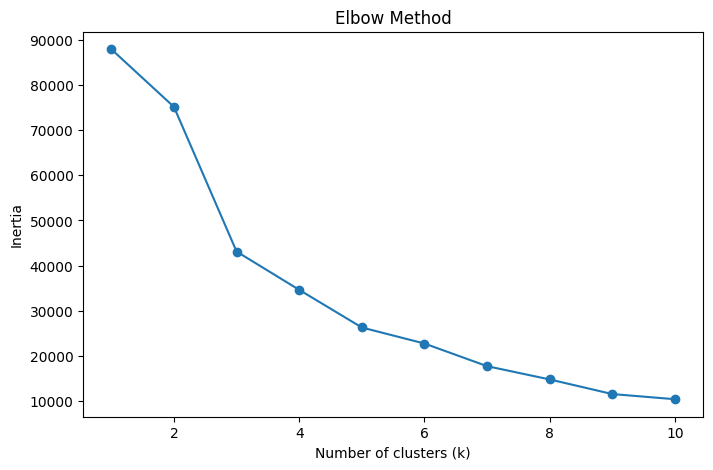

In [6]:

inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_model.fit(df_scaled)
    inertia.append(kmeans_model.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [7]:

chosen_k = 4

kmeans = KMeans(n_clusters=chosen_k, random_state=42, n_init='auto')
df_cluster['cluster'] = kmeans.fit_predict(df_scaled)

print("First 5 records with their assigned cluster:\n")
print(df_cluster.head())

First 5 records with their assigned cluster:

   duration  bitrate  views  likes  comments  cluster
0       180     5777   4078     41         3        1
1       930     1195     33      2         1        0
2       233     3028  13227    135        17        1
3       562      431     43      1         0        0
4       300     3087    222      2         0        1


In [8]:

cluster_analysis = df_cluster.groupby('cluster').mean()

print("\nAverage values for each feature by cluster:\n")
print(cluster_analysis)


Average values for each feature by cluster:

           duration      bitrate         views          likes      comments
cluster                                                                    
0        229.907802   735.997317  2.618738e+04      91.533783     10.085111
1        296.911832  3821.699771  1.778988e+04      86.835136     15.846935
2        229.500000  1031.500000  1.035243e+08  396818.500000  15980.000000
3        420.000000  1399.000000  2.853403e+08  642381.000000      0.000000
